In [97]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import time
import progressbar
from matplotlib import cm

In [98]:
def dado():
    m=random.randrange(1,7,1)
    return int(m)

In [99]:
def method(n):
    contador=0
    array=[]
    for i in range(n):
        suma = dado()+dado()+dado()
        array.append(suma)
        if suma<=6:
            contador=contador+1
    return contador/n, np.asarray(array)

In [4]:
print (method(100000)[0])

0.09086


In [5]:
#def sim (m,n):
 #   array2=[]
  #  for i in range (m):
   #     a=problemita(n)[0]
    #    array2.append(a)
    #return int(np.mean(array2))

In [6]:
### Se quieren listar las posibles combinaciones de dados
# sabiendo que todas las combinaciones son igualmente
# probables (1/216). Esto se hace a partir del siguiente
# método donde se genera un array que contiene las posibles
# combinaciones ####

def listar():
    # Se crea una matriz vacía
    MT=[]
    
    # se hace un contador hasta seis para llenar la matriz
    # con los tres dados
    
    for i in range (1,6):
        for j in range (1,6):
            for k in range (1,6):
                
                #Se llena la matriz
                
                MT.append([i,j,k])
                
    return np.asarray(MT)

In [7]:
### A continuación, se guarda la matriz en una 
# variable y se verifica que su tamaño sea 6^3,
# luego se cuentan cuáles de estas dan una suma
# menor a seis ###


a=listar()
#print (len(a))
contador=0
NEWM=[]

for i in range(len(a)):
    
    # Se verifica la condición sobre todos los 
    # elementos de la matriz
    
    if np.sum(a[i])<6:
        contador=contador+1
        NEWM.append(a[i])
print (contador)
print (contador/len(a))
b=np.asarray(NEWM)
print (b)


contador2=0
for i in range (len(b)):
    if np.sum(b[i])<4:
        contador2=contador2+1
print (contador2)

10
0.08
[[1 1 1]
 [1 1 2]
 [1 1 3]
 [1 2 1]
 [1 2 2]
 [1 3 1]
 [2 1 1]
 [2 1 2]
 [2 2 1]
 [3 1 1]]
1


In [8]:
## Nueva variable aleatoria Y=S_2 -D3

def Y():
    
    #Se ejecuta el metodo para obtener tres lanzamientos 
    D1=dado()
    D2=dado()
    D3=dado()
    #DEBUG
    #print("D1= ", D1 ,"D2= ", D2 ,"D3=" ,D3)
    
    #Se crea la nueva variable aleatoria con los resultados
    y=D1+D2-D3
    return y

print(Y())

2


In [9]:
#Funcion para iterar n veces este procedimiento y guardar
#los resultados

def iterar(n):
    array=[]
    bar = progressbar.ProgressBar(max_value=n)
    for i in range(n):
        time.sleep(0)
        bar.update(i)
        #DEBUG
        #print(Y())
        
        array.append(Y())
    return np.asarray(array)

 99% (9996245 of 10000000) |############ | Elapsed Time: 0:01:21 ETA:   0:00:00

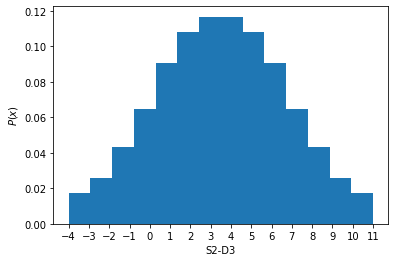

In [11]:
resultado=iterar(10000000)

#Se grafica para un millon  lanzamientos
plt.figure()
plt.hist(resultado, density=True, bins=14)
plt.ylabel('$P(x)$')
plt.xlabel('S2-D3') 
plt.xticks(np.linspace(-4, 11,16))
plt.show()

In [10]:
media=np.mean(resultado)
desviacionstd=np.std(resultado)
moda=stats.mode(resultado,axis=None)
print ("media=", media,"desviacionstd=", desviacionstd, "moda=", moda)

NameError: name 'resultado' is not defined

In [46]:
def caminata(N,pos):
    steps=[]
    road=[pos]
    
    for i in range(N):
        r=np.random.rand()
        if r<0.5:
            steps.append(-1)
            pos=pos-1
            road.append(pos)
            #print(pos)
        else:
            steps.append(1)
            pos=pos+1
            road.append(pos)
            #print(pos)

    return np.asarray(steps),np.asarray(road)


In [47]:
caminata(100,0)

(array([ 1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
         1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
         1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1]),
 array([ 0,  1,  0,  1,  2,  3,  2,  1,  0, -1,  0,  1,  0,  1,  2,  1,  2,
         1,  0,  1,  0, -1,  0, -1,  0,  1,  2,  1,  2,  1,  2,  3,  4,  5,
         4,  3,  4,  5,  6,  5,  6,  7,  6,  7,  6,  7,  6,  5,  6,  5,  4,
         3,  2,  3,  4,  5,  6,  7,  6,  5,  6,  7,  6,  7,  8,  9, 10, 11,
        10, 11, 10, 11, 10,  9, 10,  9, 10,  9,  8,  7,  8,  9, 10, 11, 10,
         9, 10, 11, 10,  9, 10,  9,  8,  9,  8,  9, 10,  9, 10,  9,  8]))

In [86]:
def iguales(N):
    
    posi=[]
    dat=[]
    contador2=0
    
    in1=caminata(N,0)
    in2=caminata(N,0)
    
    bar = progressbar.ProgressBar(max_value=N)

        
   
    for i in range (N):
        time.sleep(0)
        bar.update(i)
        if(np.array_equal(in1[1][i],in2[1][i])):
            contador2=contador2+1
            posi.append(i)
            dat.append(in1[1][i])
            
    
    plt.plot(in1[1],color=cm.hsv(1/np.random.randint(1,10)),linewidth=1)
    plt.plot(in2[1],color=cm.hsv(1/np.random.randint(1,10)),linewidth=2)
    plt.scatter(posi,dat,marker="x",color="black",linewidths=6,s=100)
    
    
    
    return contador2

N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

45

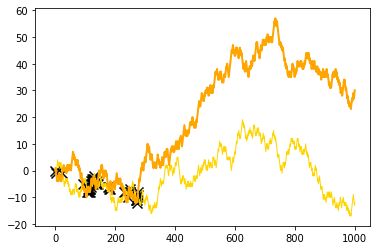

In [87]:
iguales(1000)

In [50]:
def ords(N):
    arrays=[]
    quantity=[]
    bar2 = progressbar.ProgressBar(max_value=N)
    for i in range(10,N,10):
        time.sleep(0)
        bar2.update(i)
        arrays.append(iguales(i))
        quantity.append(i)
    return arrays,quantity

 53% (5312 of 9990) |##########          | Elapsed Time: 0:00:00 ETA:  00:00:00

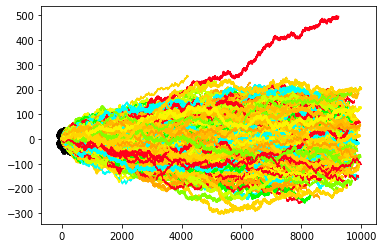

In [40]:
data=ords(10000)

In [41]:
print(data[0],data[1])

[9, 3, 6, 10, 6, 9, 2, 12, 18, 21, 8, 2, 4, 33, 6, 23, 10, 2, 9, 11, 8, 22, 29, 19, 33, 10, 32, 19, 13, 26, 8, 25, 8, 6, 39, 5, 6, 3, 20, 30, 43, 9, 21, 2, 21, 8, 2, 11, 42, 16, 40, 18, 26, 22, 35, 82, 68, 84, 1, 6, 22, 31, 27, 18, 50, 82, 9, 15, 51, 30, 72, 21, 52, 41, 18, 7, 41, 7, 42, 28, 3, 35, 57, 50, 28, 28, 20, 77, 8, 32, 63, 18, 29, 66, 38, 47, 93, 43, 3, 19, 3, 5, 15, 36, 38, 72, 54, 68, 12, 78, 6, 60, 49, 22, 48, 51, 33, 21, 21, 62, 91, 51, 13, 14, 8, 83, 36, 17, 25, 18, 42, 2, 20, 56, 14, 9, 91, 12, 4, 11, 116, 4, 12, 58, 69, 38, 22, 43, 78, 30, 17, 37, 82, 10, 149, 42, 49, 72, 26, 132, 8, 82, 122, 52, 20, 5, 186, 24, 12, 21, 29, 39, 55, 4, 26, 49, 51, 14, 20, 45, 12, 11, 63, 7, 23, 64, 40, 75, 10, 13, 62, 24, 16, 85, 1, 59, 15, 143, 29, 76, 68, 81, 21, 129, 59, 66, 1, 21, 118, 15, 68, 32, 68, 57, 28, 62, 57, 4, 15, 37, 61, 29, 38, 65, 9, 25, 64, 36, 72, 37, 16, 176, 63, 7, 84, 22, 137, 77, 143, 93, 87, 4, 42, 52, 57, 95, 4, 56, 74, 124, 73, 30, 37, 51, 13, 41, 123, 13, 41, 

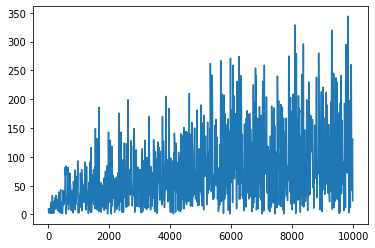

In [42]:
plt.plot(data[1],data[0])

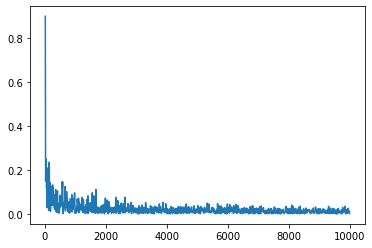

In [43]:
plt.plot(data[1],np.divide(data[0],data[1]))

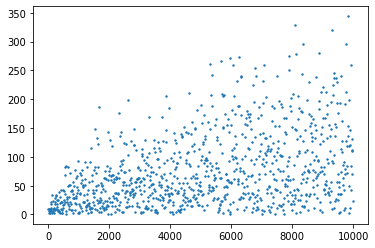

In [44]:
plt.scatter(data[1],data[0],s=2)

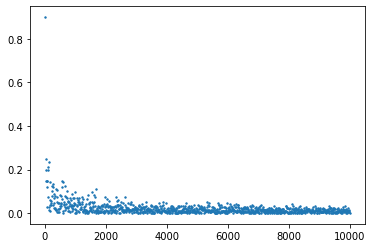

In [45]:
plt.scatter(data[1],np.divide(data[0],data[1]),s=2)

 98% (258826 of 262144) |############### | Elapsed Time: 0:00:02 ETA:   0:00:00

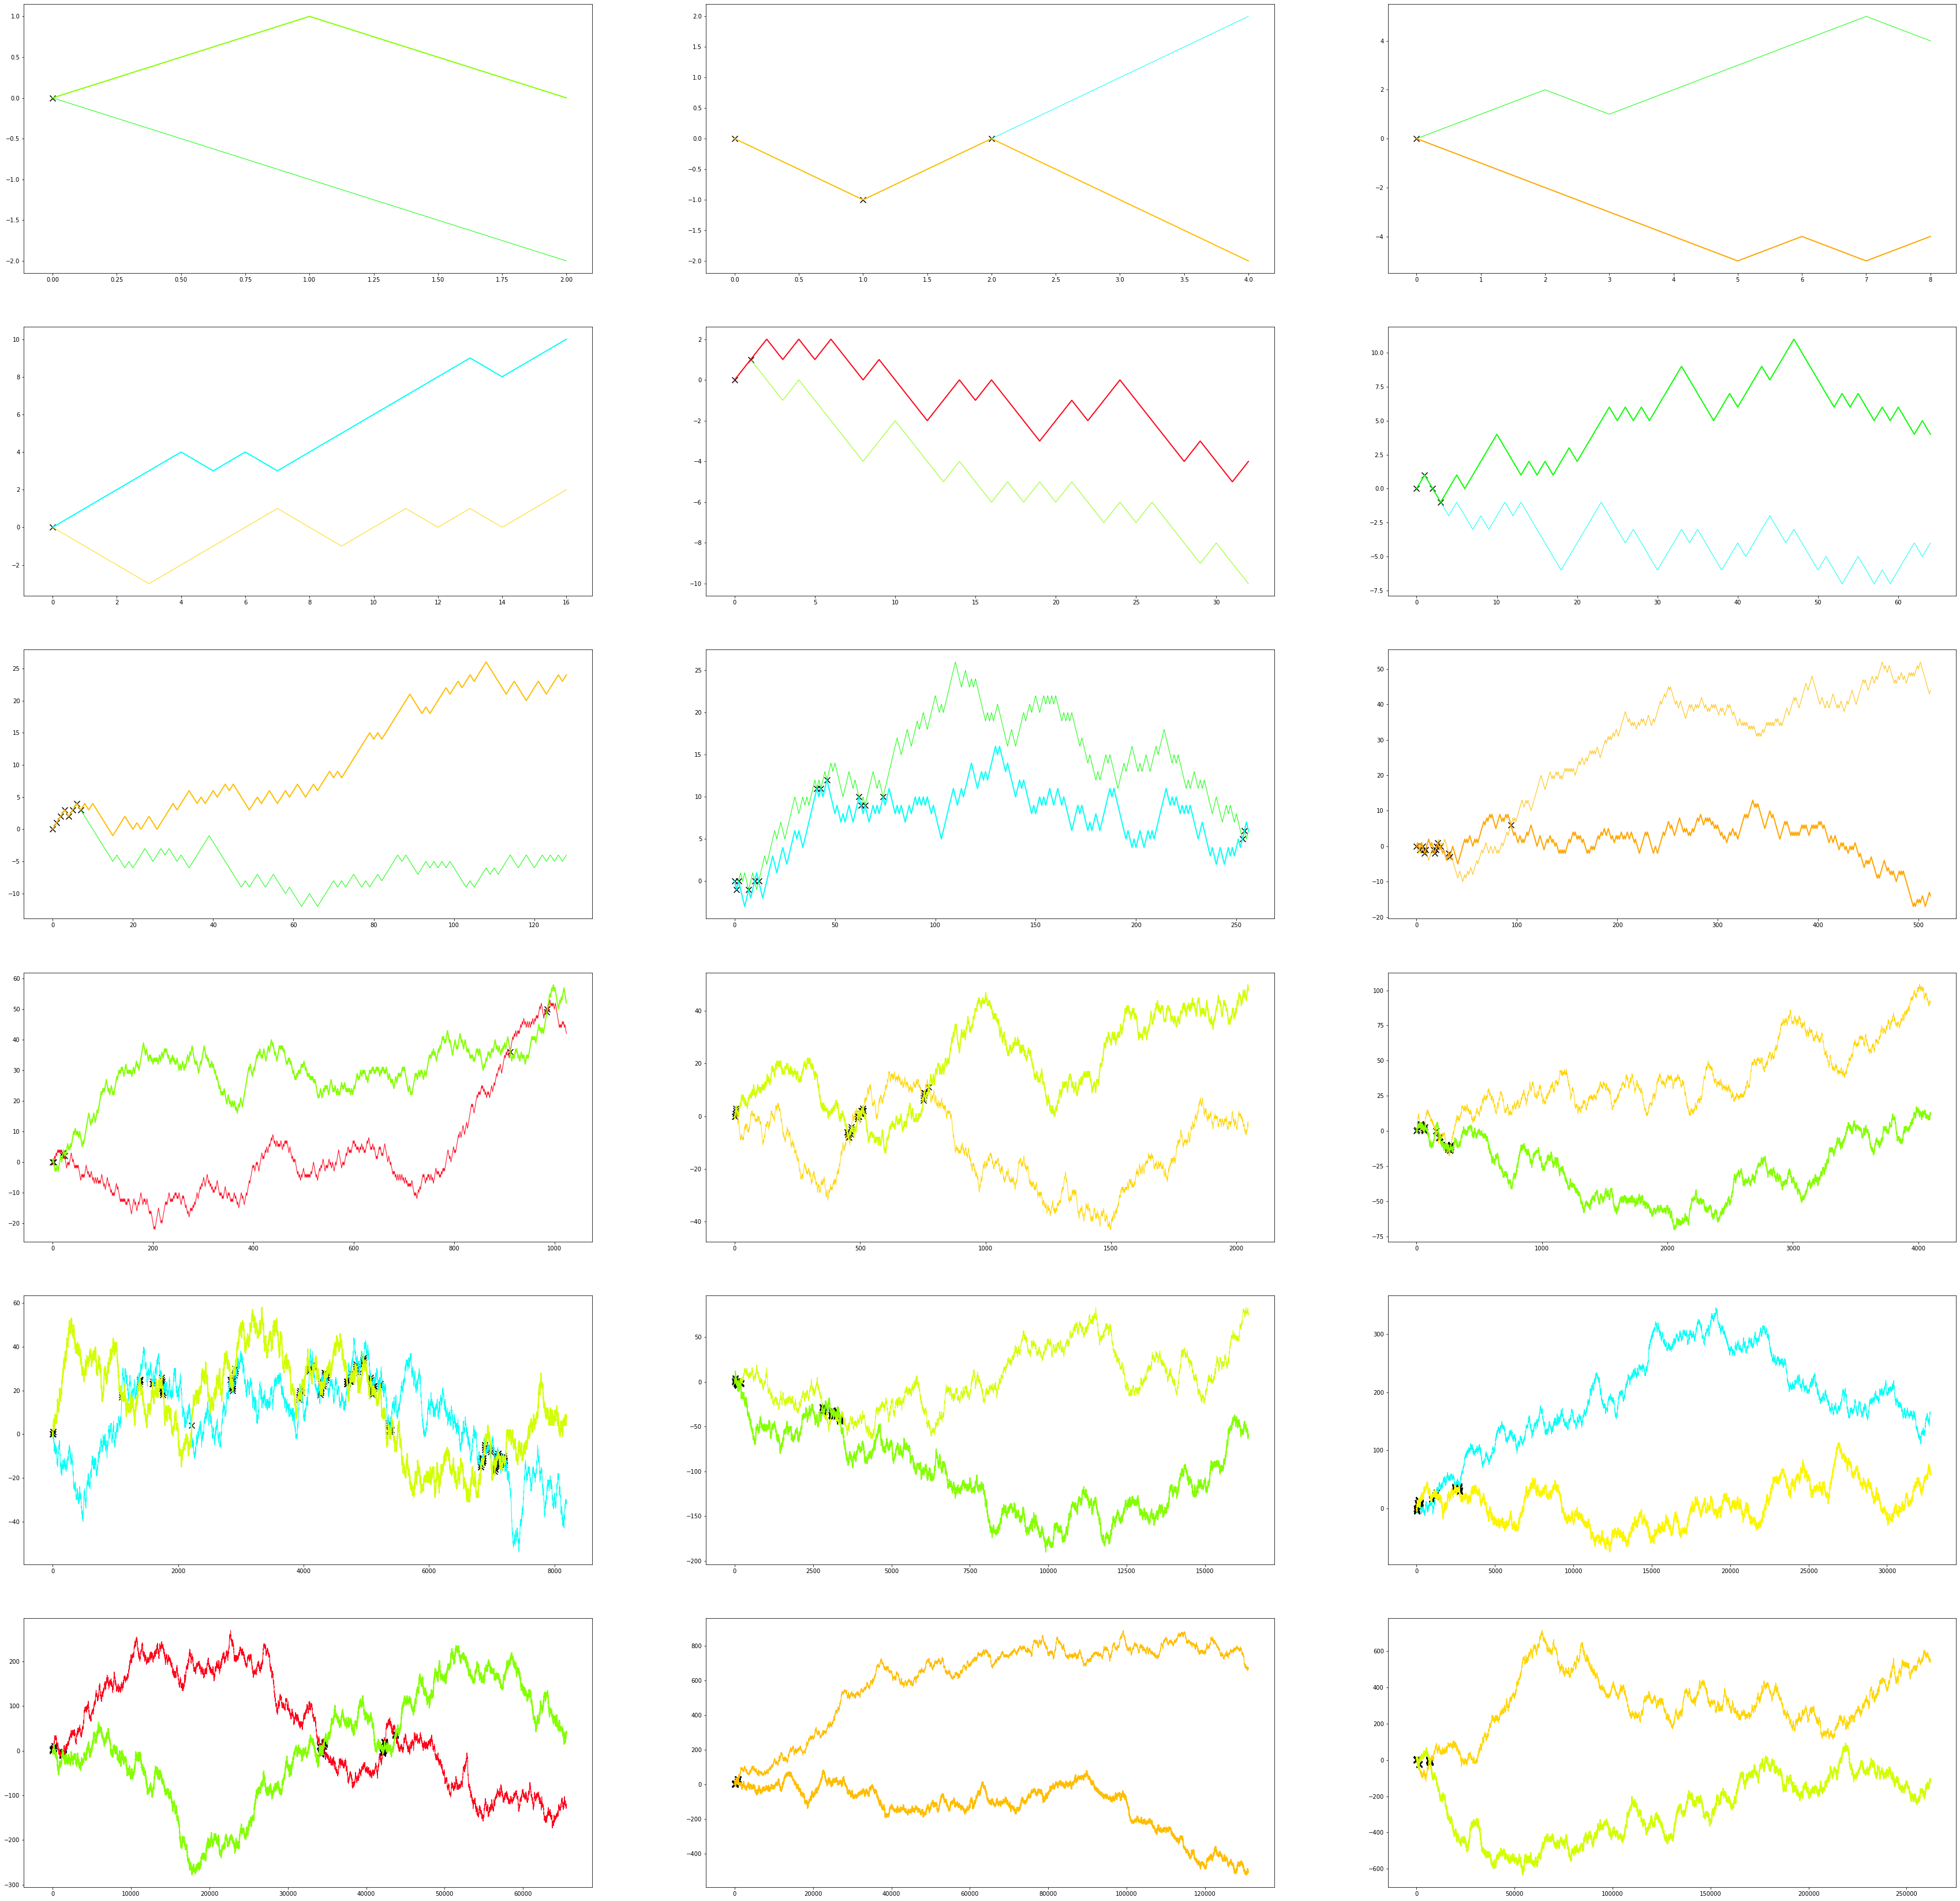

In [96]:

plt.figure(figsize=(60,60))
for i in range (1,19):
    plt.subplot(6,3,i)
    _=iguales(2**i)


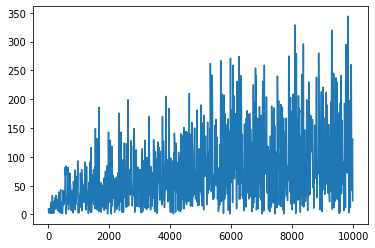

In [104]:
def sumaa(N):
    netwalk=[]
    for i in range (N):
        netwalk
        